# Youtube trending videos 데이터 탐색 및 분석

### 1. Overview of statistics
- 결측치, 중복값 파악
- datetime 타입 변경
- category_id에 category명 연결

### 2. trending 동영상 특징 파악
- 동영상별 trending 횟수 파악
- 월별, 카테고리별 trending 동영상 추이
- 등록 요일별 / 시간대별 차이

### 3. trending하기까지의 기간 확인
- 데이터 수정
- 데이터 분포, 카테고리별 데이터 분포 확인
- 이상치 결과값 확인
  
### 4. 사용자 반응(조회수, 좋아요, 싫어요, 댓글 수)파악
- 사용자 반응 분포 확인
- 카테고리별 사용자 반응 확인
- 사용자 반응 별 상관관계 확인

### 5.기능 사용 유무에 따른 비교
- comments/ratings_disabled 기능 사용 비율
- comments/ratings_disabled 기능의 views에의 영향
- views 기준 사분위 분류 -> 분위별 비율 확인

# Importing

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import json
import warnings
warnings.filterwarnings('ignore')

# 1. Overview of statistics

In [21]:
videos_df = pd.read_csv('./KRvideos.csv', encoding_errors='ignore')
videos_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,RxGQe4EeEpA,17.14.11,좋아 by 민서_윤종신_좋니 답가,라푸마코리아,22,2017-11-13T07:07:36.000Z,"라푸마|""윤종신""|""좋니""|""좋아""|""샬레""|""민서""",156130,1422,40,272,https://i.ytimg.com/vi/RxGQe4EeEpA/default.jpg,False,False,False,윤종신 '좋니'의 답가 '좋아' 최초 공개!\n그 여자의 이야기를 지금 만나보세요....
1,hH7wVE8OlQ0,17.14.11,JSA 귀순 북한군 총격 부상,Edward,25,2017-11-13T10:59:16.000Z,"JSA|""귀순""|""북한군""|""총격""|""부상""|""JSA 귀순 북한군 총격 부상""",76533,211,28,113,https://i.ytimg.com/vi/hH7wVE8OlQ0/default.jpg,False,False,False,[채널A단독]北 병사 현재 '의식불명'… 혈압 떨어지는 중 \n[채널A단독]우리측 ...
2,9V8bnWUmE9U,17.14.11,나몰라패밀리 운동화 영상 2탄 (빼빼로데이버젼),나몰라패밀리 핫쇼,22,2017-11-11T07:16:08.000Z,"아디다스|""빼빼로""|""핫쇼""|""나몰라패밀리""|""대학로""|""공연""",421409,5112,166,459,https://i.ytimg.com/vi/9V8bnWUmE9U/default.jpg,False,False,False,퍼가실때 꼭 출처 부탁드려요
3,0_8py-t5R80,17.14.11,"이명박 출국 현장, 놓치면 안되는 장면",미디어몽구,25,2017-11-12T11:19:52.000Z,"이명박|""이명박 출국금지""|""이명박 출국현장""|""이명박 바레인""|""이명박 대통령""|...",222850,2093,173,1219,https://i.ytimg.com/vi/0_8py-t5R80/default.jpg,False,False,False,다스는 누구겁니까 듣고 난 후 표정
4,bk55RbxiQdI,17.14.11,김장겸은 물러갔다 MBC 노조 환호와 눈물,NocutV,25,2017-11-13T11:08:59.000Z,"nocutV|""노컷V""|""CBS""|""mbc""|""김장겸""|""해임""|""허일후""",84466,1094,109,450,https://i.ytimg.com/vi/bk55RbxiQdI/default.jpg,False,False,False,김장겸 MBC 사장이 결국 해임됐다.\n\nMBC 대주주인 방송문화진흥회는 13일 ...


### 결측치, 중복값 파악

In [22]:
videos_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34567 entries, 0 to 34566
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                34567 non-null  object
 1   trending_date           34567 non-null  object
 2   title                   34567 non-null  object
 3   channel_title           34567 non-null  object
 4   category_id             34567 non-null  int64 
 5   publish_time            34567 non-null  object
 6   tags                    34567 non-null  object
 7   views                   34567 non-null  int64 
 8   likes                   34567 non-null  int64 
 9   dislikes                34567 non-null  int64 
 10  comment_count           34567 non-null  int64 
 11  thumbnail_link          34567 non-null  object
 12  comments_disabled       34567 non-null  bool  
 13  ratings_disabled        34567 non-null  bool  
 14  video_error_or_removed  34567 non-null  bool  
 15  de

In [23]:
videos_df.shape

(34567, 16)

In [24]:
videos_df.duplicated().sum()

2316

In [25]:
print('중복 제거 이전 : ', len(videos_df))
videos_df.drop_duplicates(inplace=True, ignore_index=True)
print('중복 제거 이후 : ', len(videos_df))

중복 제거 이전 :  34567
중복 제거 이후 :  32251


### datetime 컬럼 수정

In [26]:
videos_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,RxGQe4EeEpA,17.14.11,좋아 by 민서_윤종신_좋니 답가,라푸마코리아,22,2017-11-13T07:07:36.000Z,"라푸마|""윤종신""|""좋니""|""좋아""|""샬레""|""민서""",156130,1422,40,272,https://i.ytimg.com/vi/RxGQe4EeEpA/default.jpg,False,False,False,윤종신 '좋니'의 답가 '좋아' 최초 공개!\n그 여자의 이야기를 지금 만나보세요....
1,hH7wVE8OlQ0,17.14.11,JSA 귀순 북한군 총격 부상,Edward,25,2017-11-13T10:59:16.000Z,"JSA|""귀순""|""북한군""|""총격""|""부상""|""JSA 귀순 북한군 총격 부상""",76533,211,28,113,https://i.ytimg.com/vi/hH7wVE8OlQ0/default.jpg,False,False,False,[채널A단독]北 병사 현재 '의식불명'… 혈압 떨어지는 중 \n[채널A단독]우리측 ...
2,9V8bnWUmE9U,17.14.11,나몰라패밀리 운동화 영상 2탄 (빼빼로데이버젼),나몰라패밀리 핫쇼,22,2017-11-11T07:16:08.000Z,"아디다스|""빼빼로""|""핫쇼""|""나몰라패밀리""|""대학로""|""공연""",421409,5112,166,459,https://i.ytimg.com/vi/9V8bnWUmE9U/default.jpg,False,False,False,퍼가실때 꼭 출처 부탁드려요
3,0_8py-t5R80,17.14.11,"이명박 출국 현장, 놓치면 안되는 장면",미디어몽구,25,2017-11-12T11:19:52.000Z,"이명박|""이명박 출국금지""|""이명박 출국현장""|""이명박 바레인""|""이명박 대통령""|...",222850,2093,173,1219,https://i.ytimg.com/vi/0_8py-t5R80/default.jpg,False,False,False,다스는 누구겁니까 듣고 난 후 표정
4,bk55RbxiQdI,17.14.11,김장겸은 물러갔다 MBC 노조 환호와 눈물,NocutV,25,2017-11-13T11:08:59.000Z,"nocutV|""노컷V""|""CBS""|""mbc""|""김장겸""|""해임""|""허일후""",84466,1094,109,450,https://i.ytimg.com/vi/bk55RbxiQdI/default.jpg,False,False,False,김장겸 MBC 사장이 결국 해임됐다.\n\nMBC 대주주인 방송문화진흥회는 13일 ...


In [28]:
videos_df['trending_date'] = pd.to_datetime(videos_df['trending_date'], format = '%y.%d.%m')
videos_df['publish_time'] = pd.to_datetime(videos_df['publish_time'])

videos_df[['trending_date','publish_time']].dtypes

trending_date         datetime64[ns]
publish_time     datetime64[ns, UTC]
dtype: object

In [36]:
# publish_date 날짜 시간 컬럼 따로 생성하기
videos_df.insert(5, 'publish_date', pd.to_datetime(videos_df['publish_time']).dt.date)
videos_df['publish_time'] = videos_df['publish_time'].dt.time

In [37]:
### 카테고리 컬럼 수정
videos_df['category_id'] = videos_df['category_id'].astype(str)
category_id = {}

with open('./KR_category_id.json','r') as f:
    data = json.load(f)
    for category in data['items']:
        category_id[category['id']] = category['snippet']['title']

videos_df.insert(5, 'category', videos_df['category_id'].map(category_id))
category_list = videos_df['category'].unique()
category_list

array(['People & Blogs', 'News & Politics', 'Sports', 'Travel & Events',
       'Comedy', 'Music', 'Entertainment', 'Pets & Animals',
       'Film & Animation', 'Shows', 'Science & Technology', 'Gaming', nan,
       'Autos & Vehicles', 'Education', 'Howto & Style', 'Trailers'],
      dtype=object)

# 2. trending 동영상 특징 파악

In [43]:
# 트렌드 상위 5개 영상 확인
trending_count = videos_df.groupby('title')['trending_date'].count().reset_index()
trending_count.sort_values(by='trending_date', ascending=False, inplace=True)
trending_count.head()

,title,trending_date
11152,브베 실시간 스트리밍,19
13751,"이재용 여자관계와 연예인, 배우 이나영, 윤은혜가, 조수빈",9
2218,"Bruno Mars,Charlie Puth,Ed Sheeran Best Christ...",9
2890,Marvel Studios' Avengers: Infinity War Officia...,8
8669,나얼 (Naul) - 기억의 빈자리 (Emptiness in Memory) MV,8


In [44]:
# 통계량 확인
print(trending_count.describe())

       trending_date
count   16353.000000
mean        1.972176
std         1.068082
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        19.000000


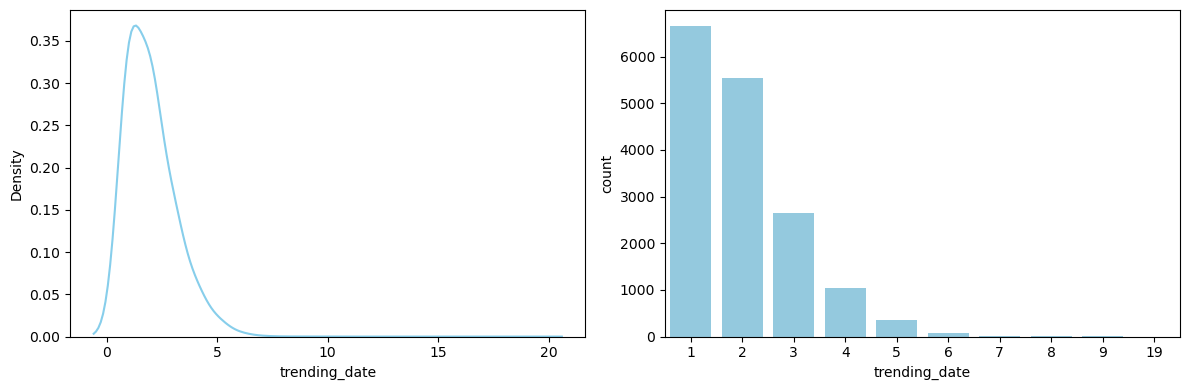

In [45]:
f, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 4))

sns.kdeplot(trending_count['trending_date'], bw_method=0.5, color='skyblue', ax=ax1)
sns.countplot(data= trending_count, x='trending_date', color='skyblue', ax=ax2)

plt.tight_layout()

### 월별 카테고리별 trending 동영상 추이
#### 1. month 단위로 정리

In [46]:
# 연-월로만 trending date를 다시 정리
videos_df['trending_month'] = videos_df['trending_date'].dt.strftime('%Y%m')
videos_df[['trending_date','trending_month']].head()

,trending_date,trending_month
0,2017-11-14,201711
1,2017-11-14,201711
2,2017-11-14,201711
3,2017-11-14,201711
4,2017-11-14,201711


#### 2. 월별 카테고리별 trending video 수 집계

In [47]:
# nunique()로, 중복을 제거해 집계(같은 month에 같은 title의 영상이 2번이상 trending한 경우 1번으로 집계)
groupby_df1 = videos_df.groupby(['trending_month','category'])['title'].nunique().reset_index()
groupby_df1.rename(columns={'title':'count'}, inplace=True)
groupby_df1.head()

,trending_month,category,count
0,201711,Autos & Vehicles,12
1,201711,Comedy,62
2,201711,Education,19
3,201711,Entertainment,354
4,201711,Film & Animation,111


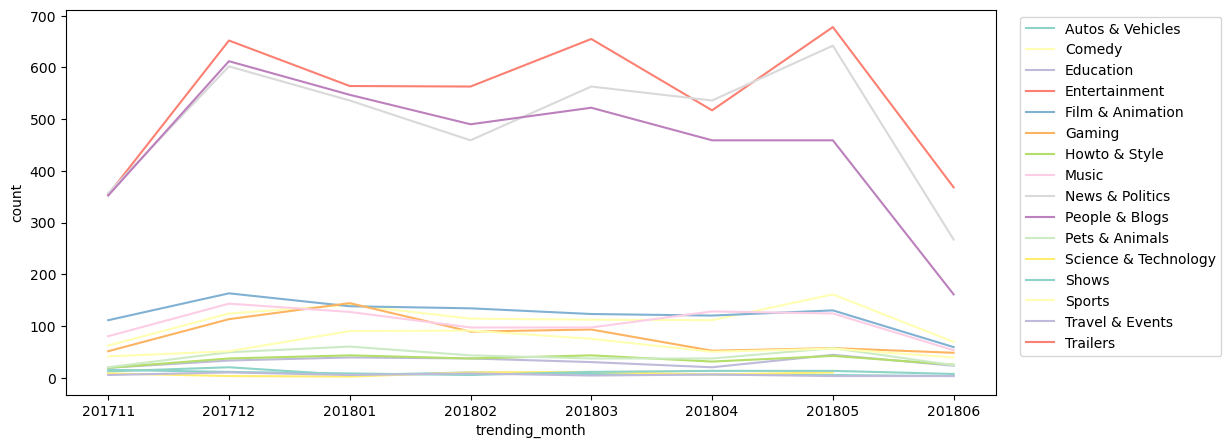

In [53]:
plt.figure(figsize=(12, 5))
sns.lineplot(data=groupby_df1, x='trending_month', y='count', hue='category', palette='Set3')
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))
plt.show()

- Entertainment, News&Politics, People&Blogs 카테고리가 가장 인기있다.
- 2017년 11월, 2018년 6월에 인기 동영상의 개수가 낮음.

### 등록 요일별/시간대별 차이

In [73]:
# 등록된 '요일'을 별도 컬럼으로 저장 (0:월~6:금)
# videos_df.insert(8, 'publish_day', pd.to_datetime(videos_df['publish_date']).dt.weekday)
# videos_df.insert(8, 'publish_hour', videos_df['publish_time'].astype(str).str.split(':').str[0])
videos_df.head(2)

,video_id,trending_date,title,channel_title,category_id,category,publish_date,publish_time,publish_hour,publish_day,...,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,trending_month
0,RxGQe4EeEpA,2017-11-14,좋아 by 민서_윤종신_좋니 답가,라푸마코리아,22,People & Blogs,2017-11-13,07:07:36,07,0,...,156130,1422,40,272,https://i.ytimg.com/vi/RxGQe4EeEpA/default.jpg,False,False,False,윤종신 '좋니'의 답가 '좋아' 최초 공개!\n그 여자의 이야기를 지금 만나보세요....,201711
1,hH7wVE8OlQ0,2017-11-14,JSA 귀순 북한군 총격 부상,Edward,25,News & Politics,2017-11-13,10:59:16,10,0,...,76533,211,28,113,https://i.ytimg.com/vi/hH7wVE8OlQ0/default.jpg,False,False,False,[채널A단독]北 병사 현재 '의식불명'… 혈압 떨어지는 중 \n[채널A단독]우리측 ...,201711


In [75]:
videos_df[['publish_date', 'publish_day', 'publish_hour']].head()

,publish_date,publish_day,publish_hour
0,2017-11-13,0,07
1,2017-11-13,0,10
2,2017-11-11,5,07
3,2017-11-12,6,11
4,2017-11-13,0,11


#### 1. 등록 요일별 trending video count 비교

<Axes: xlabel='publish_day', ylabel='count'>

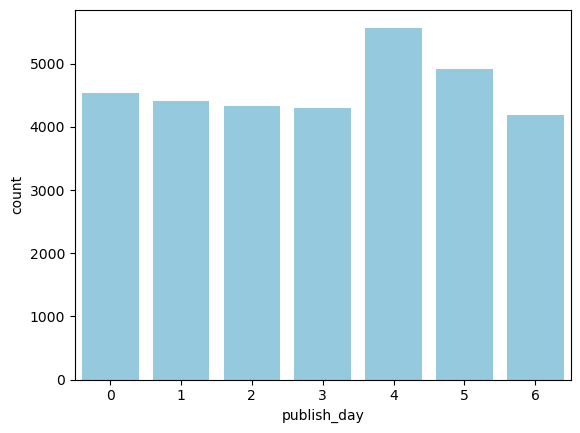

In [76]:
sns.countplot(data=videos_df, x='publish_day', color='skyblue')

- 금요일에 publish된 동영상이 trending한 수가 많다.

#### 2. 등록 시간별 trending video count 비교

<Axes: xlabel='publish_hour', ylabel='video_id'>

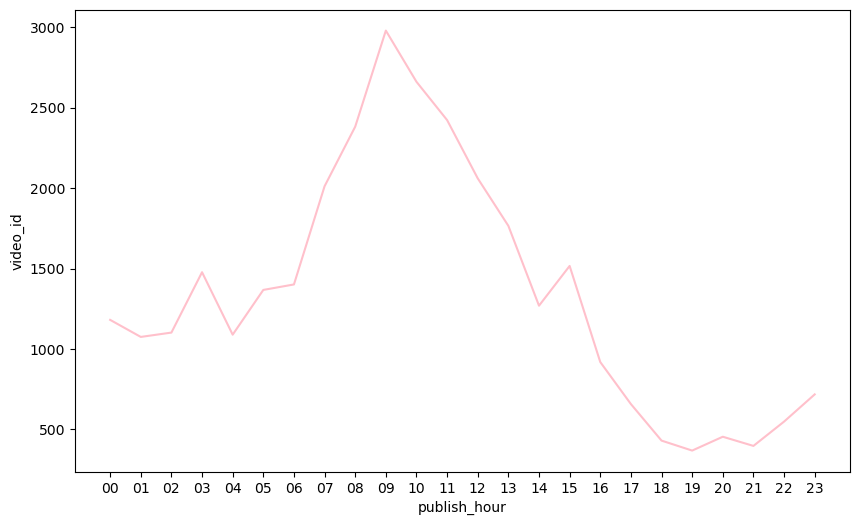

In [77]:
hour_group = videos_df.groupby('publish_hour')['video_id'].count().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=hour_group, x='publish_hour', y='video_id', color='pink')

- 오전 9시 전후에 publish된 동영상이 trending한 수가 많다.

<Axes: xlabel='publish_hour', ylabel='video_id'>

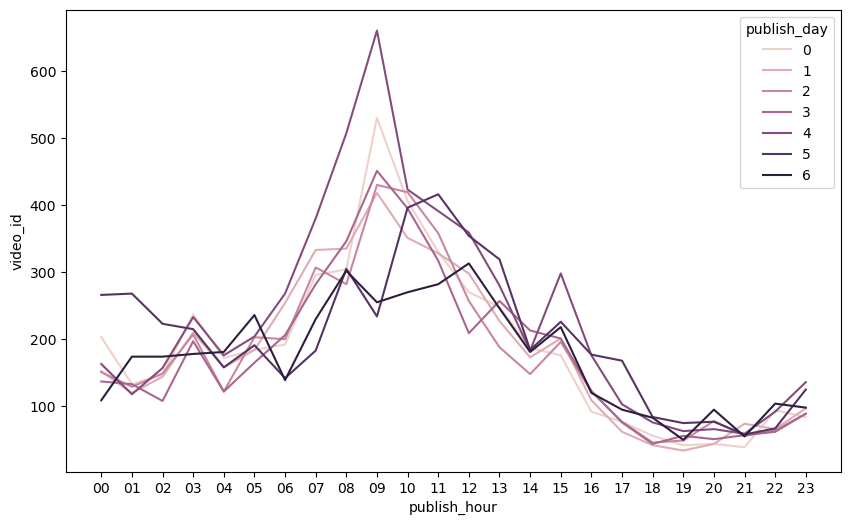

In [80]:
# 시간대별, 요일별 차이 비교
time_group = videos_df.groupby(['publish_hour', 'publish_day'])['video_id'].count().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=time_group, x='publish_hour', y='video_id', hue='publish_day')

# 3. trending하기까지의 기간 비교
- 동영상들이 대체로 publish 후 trending하기까지의 기간을 확인

In [82]:
# videos_df['trending_date'] = pd.to_datetime(videos_df['trending_date'], format='%Y-%m-%d')
# videos_df['publish_date'] = pd.to_datetime(videos_df['publish_date'])

In [86]:
videos_df['publish_to_trending'] = (videos_df['trending_date'] - videos_df['publish_date']).dt.days
videos_df[['trending_date', 'publish_date', 'publish_to_trending']].head()

,trending_date,publish_date,publish_to_trending
0,2017-11-14,2017-11-13,1
1,2017-11-14,2017-11-13,1
2,2017-11-14,2017-11-11,3
3,2017-11-14,2017-11-12,2
4,2017-11-14,2017-11-13,1


### 같은 video_id, 다른 trending_date를 가진 데이터 삭제
- 처음으로 trending한 시점의 데이터만 남기고 중복값 삭제

In [89]:
# trending_date 기준으로 오름차순 정렬
videos_df_sorted = videos_df.sort_values(by='trending_date', ignore_index=True)

#영상별로 가장 먼저 trending한 날의 데이터만 남긴 데이터셋을 unique_videos_df에 저장
unique_videos_df = videos_df_sorted.drop_duplicates(subset=['video_id', 'title'], ignore_index=True)

print('videos_df:', len(videos_df))
print('unique_videos_df: ', len(unique_videos_df))

videos_df: 32251
unique_videos_df:  16393


### 데이터 분포 확인

In [91]:
print('max days : ',videos_df['publish_to_trending'].max())
print('min days : ', videos_df['publish_to_trending'].min())
print('avg days : ', videos_df['publish_to_trending'].mean())

max days :  2337
min days :  0
avg days :  2.7073889181730797


<Axes: xlabel='publish_to_trending', ylabel='count'>

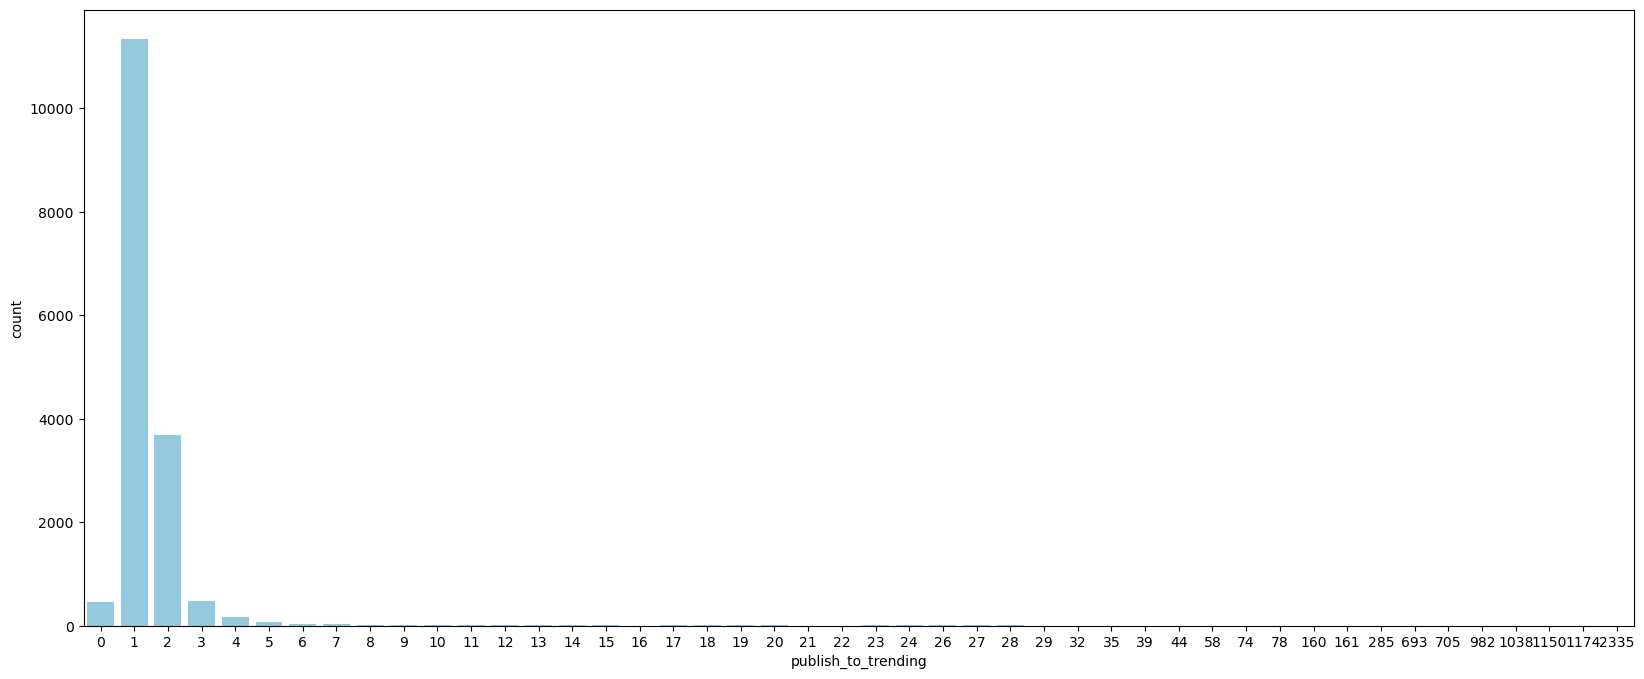

In [90]:
plt.figure(figsize=(20, 8))
sns.countplot(data=unique_videos_df, x='publish_to_trending', color='skyblue')

- 대체로 영상 등록 후 trending 되기까지의 기간이 3일 이내이며, 등록 후 하루만에 trending한 경우가 많다.

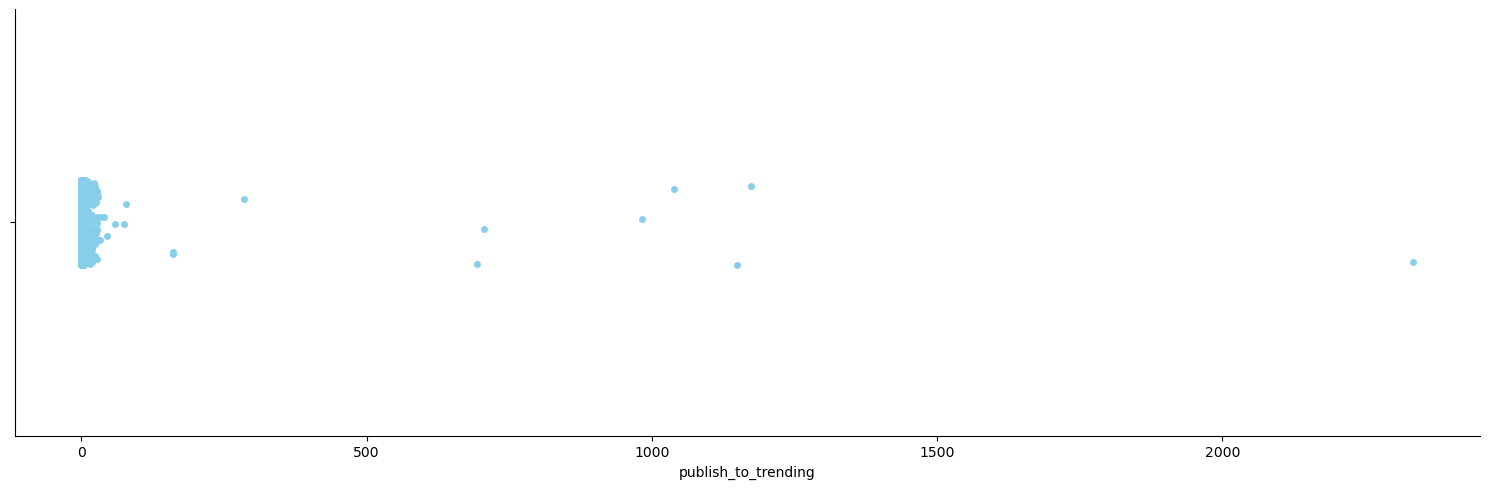

In [92]:
sns.catplot(data=unique_videos_df, x='publish_to_trending', height=5, aspect=3, color='skyblue')

- 약 20일 정도를 넘어서면, 그 이후에는 상당히 outlier간의 간격이 크게 분포

### 카테고리별 분포 확인
- 어느 카테고리에 outlier가 많이 포진되어 있는지, publish 후 trending하기까지의 평규누 기간이 어떻게 다른지 확인

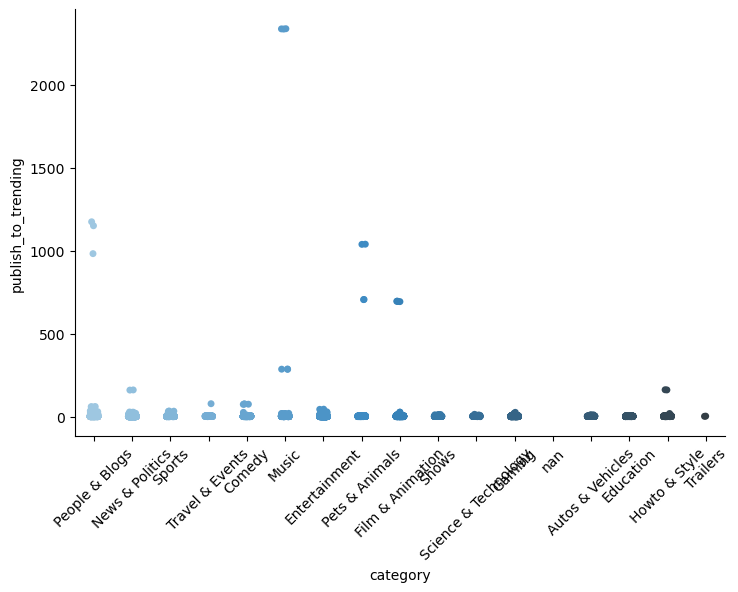

In [96]:
# 어느 카테고리에 outlier가 많이 포진되어 있는지 확인
sns.catplot(data=videos_df, x='category', y='publish_to_trending', palette='Blues_d', height=5, aspect = 1.5);
plt.xticks(rotation=45);

- 특히 Music, People & Blogs, Pet& Animals, Film & Animation 카테고리에서 정상 범주를 크게 벗어나는 데이터가 발견됨
- 음악, Entertainment 등의 경우 역주행 현상을 반영한다고 판단됨. 

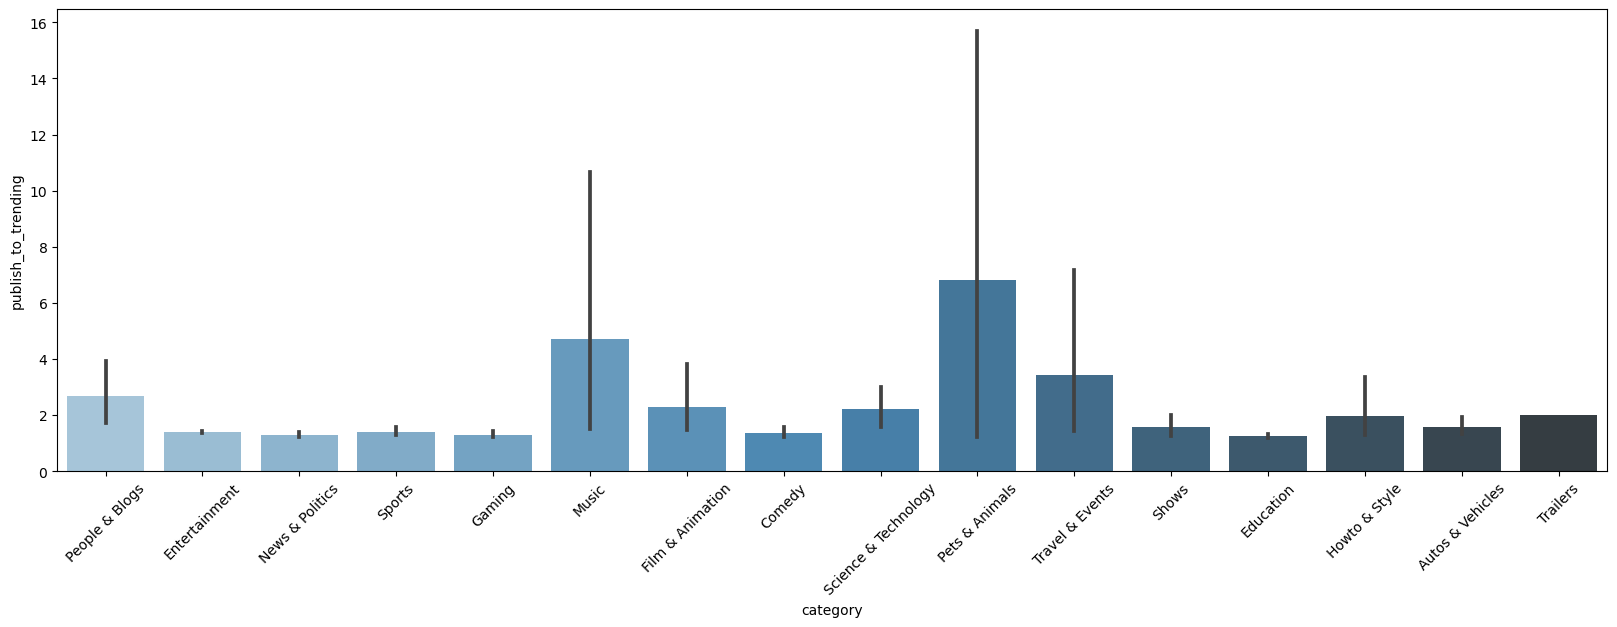

In [97]:
# 카테고리별 평균 publish~trending 기간 비교 (선은 95% 신뢰구간)
plt.figure(figsize=(20, 6))
sns.barplot(data=unique_videos_df, x='category', y='publish_to_trending', palette='Blues_d');
plt.xticks(rotation=45);

- Music, Pets&Animals 카테고리의 경우 편차가 크다
- Entertainment, News & Politics, Sports 등 시의성이 중요한 카테고리는 편차가 적은 편이다.

In [100]:
# Music 카테고리의 outlier top3확인
videos_music_df = unique_videos_df[unique_videos_df['category']=='Music']
videos_music_df.sort_values(by='publish_to_trending', ascending=False)[['title','trending_date', 'publish_date', 'publish_to_trending']].head()

,title,trending_date,publish_date,publish_to_trending
7864,손성제 - Goodbye,2018-02-19,2011-09-29,2335
1695,Taylor swift - See You Again,2017-12-02,2017-02-20,285
12731,갈수록 어려워지는 젓가락 행진곡을 이렇게 친다고????,2018-04-28,2018-04-09,19
15485,OneRepublic ft. Logic – Start Again (Audio),2018-06-03,2018-05-16,18
9739,고등래퍼2 김하온vs빈첸 2학년 싸이퍼명상랩,2018-03-16,2018-03-01,15


- 손성제 Goodbye의 경우 publish된 지 7년 후 인기 동영상이 되었는데, 효리네 민박에 나오며 유행을 다시 탔던 것으로 확인됨.

### 4. 사용자 반응 파악

### Views, likes, dislikes and comment counts 의 log 분포 확인

Text(0.5, 1.0, 'Comments Log Distribution')

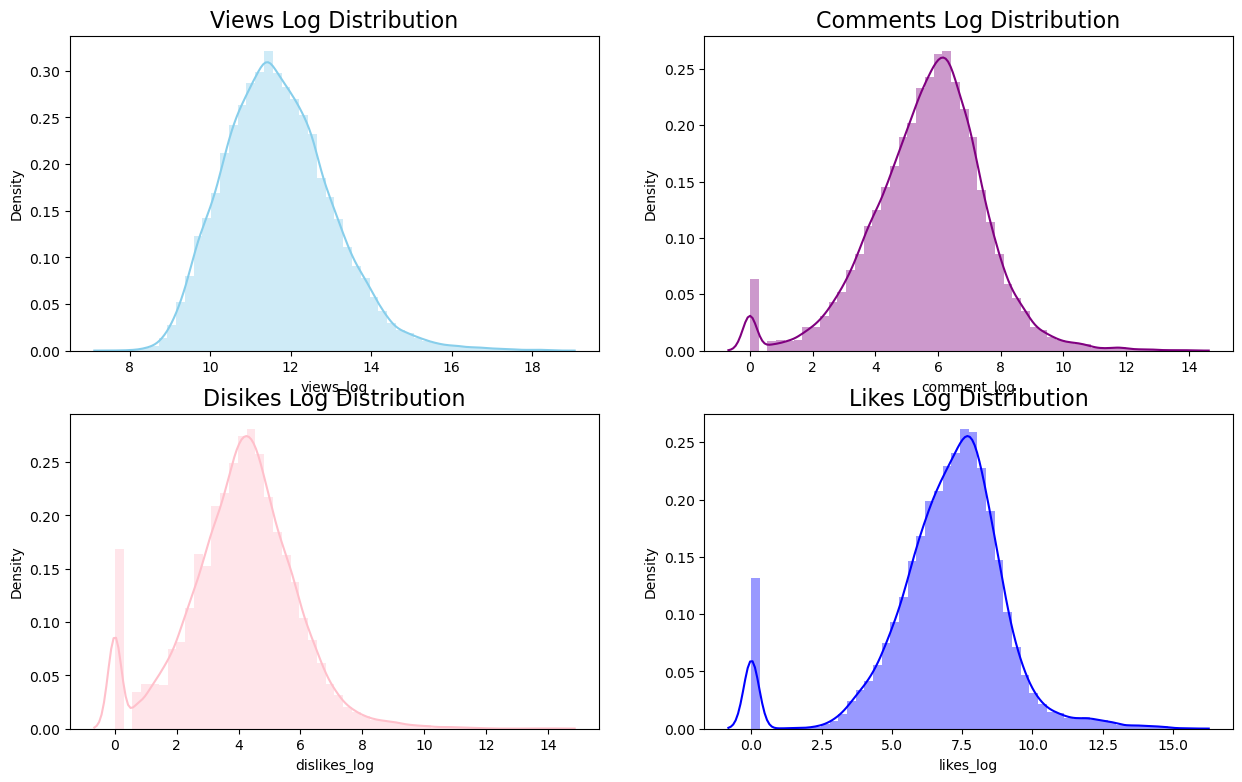

In [105]:
videos_df['likes_log'] = np.log(videos_df['likes']+1)
videos_df['views_log'] = np.log(videos_df['views']+1)
videos_df['dislikes_log'] = np.log(videos_df['dislikes']+1)
videos_df['comment_log'] = np.log(videos_df['comment_count']+1)
plt.figure(figsize=(15, 9))

plt.subplot(221)
g1 = sns.distplot(videos_df['views_log'], color='skyblue')
g1.set_title('Views Log Distribution', fontsize=16)

plt.subplot(224)
g2 = sns.distplot(videos_df['likes_log'], color='blue')
g2.set_title('Likes Log Distribution', fontsize=16)

plt.subplot(223)
g3 = sns.distplot(videos_df['dislikes_log'], color='pink')
g3.set_title('Disikes Log Distribution', fontsize=16)

plt.subplot(222)
g3 = sns.distplot(videos_df['comment_log'], color='purple')
g3.set_title('Comments Log Distribution', fontsize=16)

### 카테고리별 조회수, 좋아요, 싫어요, 댓글 확인

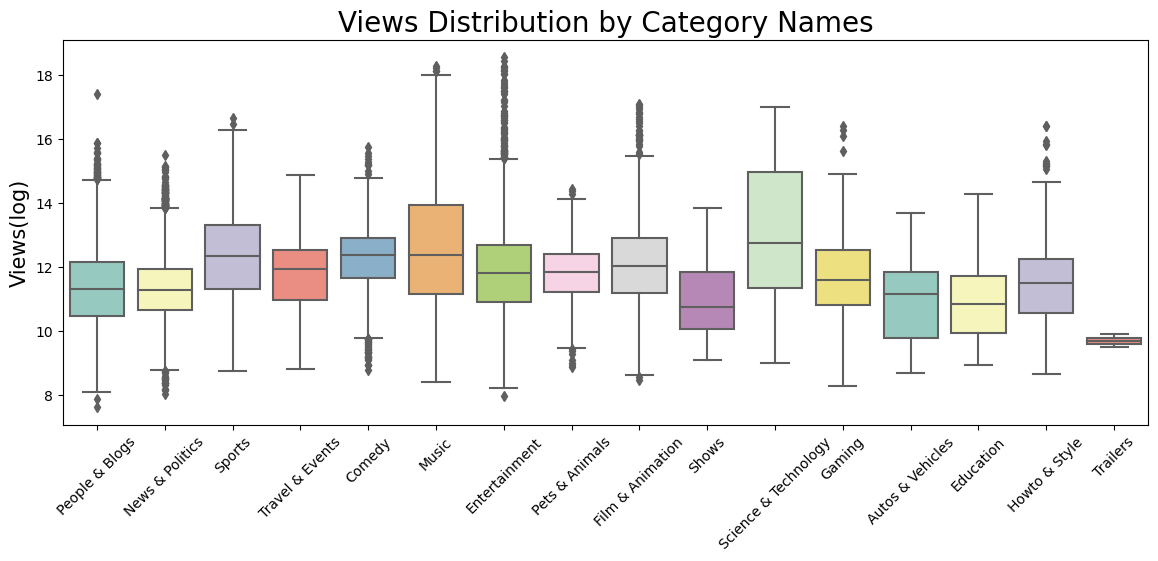

In [109]:
plt.figure(figsize=(14, 5))
g1 = sns.boxplot(x='category', y='views_log', data=videos_df, palette='Set3')
g1.set_xticklabels(g1.get_xticklabels(), rotation=45)
g1.set_title('Views Distribution by Category Names', fontsize=20)
g1.set_xlabel('', fontsize=10)
g1.set_ylabel('Views(log)', fontsize=15)
plt.show()

- Entertainment의 이상치가 많은 편이고, Music의 편차는 큰 편이다.
- Trailers와 Shows의 조회수는 낮은 편이다.

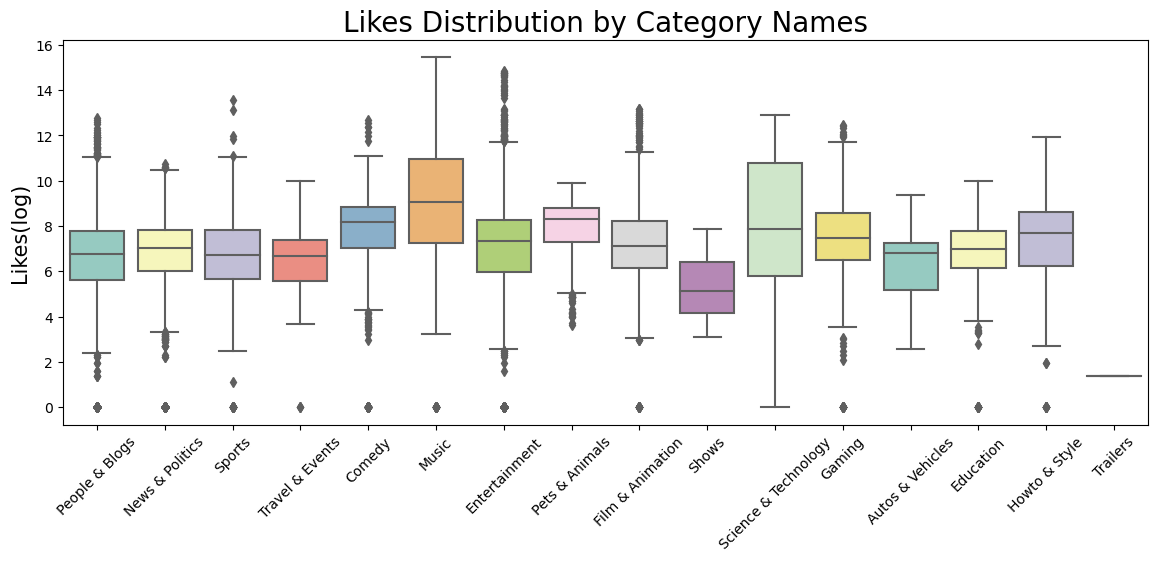

In [110]:
plt.figure(figsize=(14, 5))
g2 = sns.boxplot(x='category', y='likes_log', data=videos_df, palette='Set3')
g2.set_xticklabels(g2.get_xticklabels(), rotation = 45)
g2.set_title('Likes Distribution by Category Names', fontsize= 20)
g2.set_xlabel('', fontsize=10)
g2.set_ylabel('Likes(log)', fontsize=15)
plt.show()

- 조회수와 비슷하게 Entertainment에 이상치가 많고, Music의 분산이 크다.
- Science&Tech의 분산이 크게 나타난다.

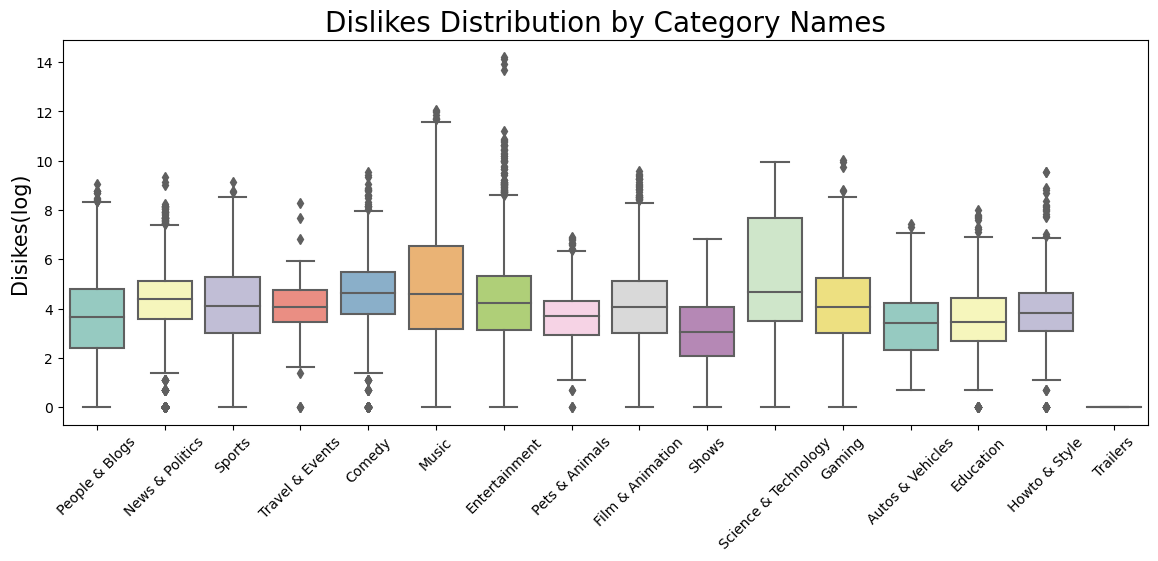

In [111]:
plt.figure(figsize=(14, 5))
g3 = sns.boxplot(x='category', y='dislikes_log', data=videos_df, palette='Set3')
g3.set_xticklabels(g2.get_xticklabels(), rotation = 45)
g3.set_title('Dislikes Distribution by Category Names', fontsize= 20)
g3.set_xlabel('', fontsize=10)
g3.set_ylabel('Disikes(log)', fontsize=15)
plt.show()

- Music, Comedy, Science&Tech, News&Politics 카테고리의 중앙값이 높은 편이다.

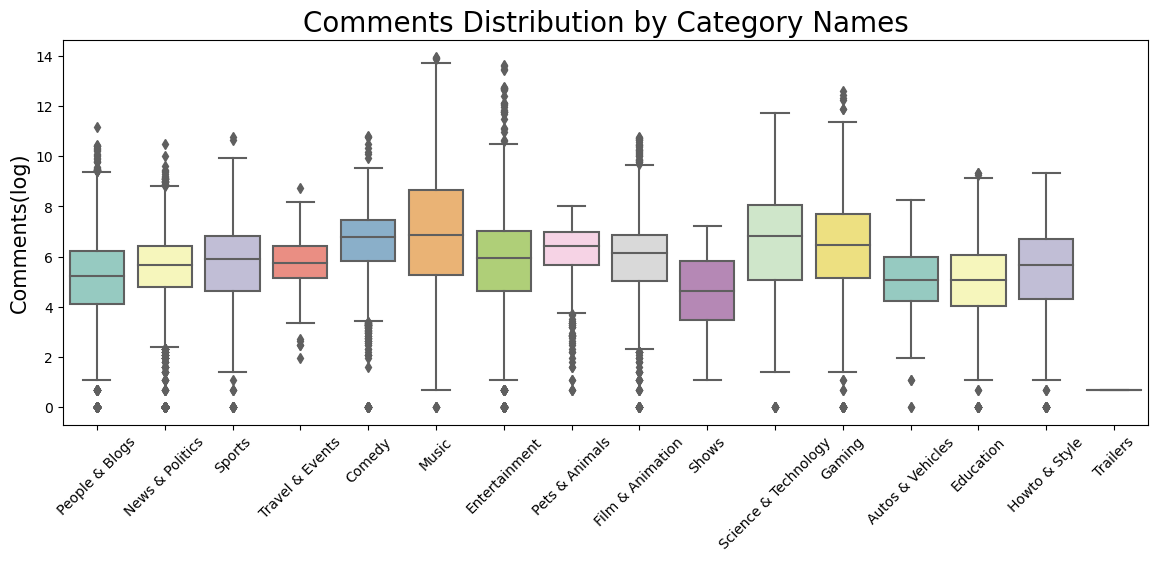

In [112]:
plt.figure(figsize = (14,5))
g4 = sns.boxplot(x='category', y='comment_log', data=videos_df, palette='Set3')
g4.set_xticklabels(g4.get_xticklabels(), rotation=45)
g4.set_title('Comments Distribution by Category Names', fontsize=20)
g4.set_xlabel('',fontsize=10)
g4.set_ylabel('Comments(log)', fontsize=15)
plt.show()

In [114]:
# 조회수, 좋아요, 싫어요, 댓글 값 파악
videos_df[['views', 'likes', 'dislikes', 'comment_count']].head()

,views,likes,dislikes,comment_count
0,156130,1422,40,272
1,76533,211,28,113
2,421409,5112,166,459
3,222850,2093,173,1219
4,84466,1094,109,450


### Views와 다른 변수 간의 관계

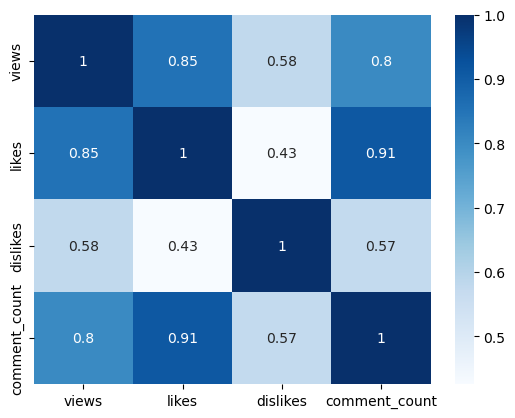

In [118]:
# 상관계수 확인 (heatmap으로 시각화)
sns.heatmap(videos_df[['views', 'likes','dislikes', 'comment_count']].corr(), annot=True, cmap='Blues')
plt.yticks();

- views는 likes, comment_count와 높은 상관관계를 보인다.
- likes와 comment_count는 높은 상관관계를 보인다.

### views와 likes
: views가 많은 영상일수록 likes도 많을까?

### 1. 상관계수 및 선형회귀선 확인

In [121]:
# rating_disabled 기능이 켜져 있으면 likes/dislikes를 누르는 것이 불가능
print(videos_df[videos_df['ratings_disabled'] == True][['likes','dislikes']].describe())

        likes  dislikes
count  1308.0    1308.0
mean      0.0       0.0
std       0.0       0.0
min       0.0       0.0
25%       0.0       0.0
50%       0.0       0.0
75%       0.0       0.0
max       0.0       0.0


In [122]:
rated_videos_df = videos_df[~videos_df['ratings_disabled']]
rated_videos_df.reset_index(drop=True, inplace=True) #reset index

print('videos_df : ', len(videos_df))
print('rated_videos_df : ', len(rated_videos_df))

videos_df :  32251
rated_videos_df :  30943


### 1. 상관계수 및 선형회귀선 확인

In [124]:
import scipy.stats as stats
# 피어슨 상관계수 검정
corr = stats.pearsonr(rated_videos_df['views'], rated_videos_df['likes'])
print('Corr_Coefficient ; %.3f\np-value : %.3f' % (corr))

Corr_Coefficient ; 0.858
p-value : 0.000


- 강한 상관관계를 보이는 것을 확인 (p-value < 0.01)

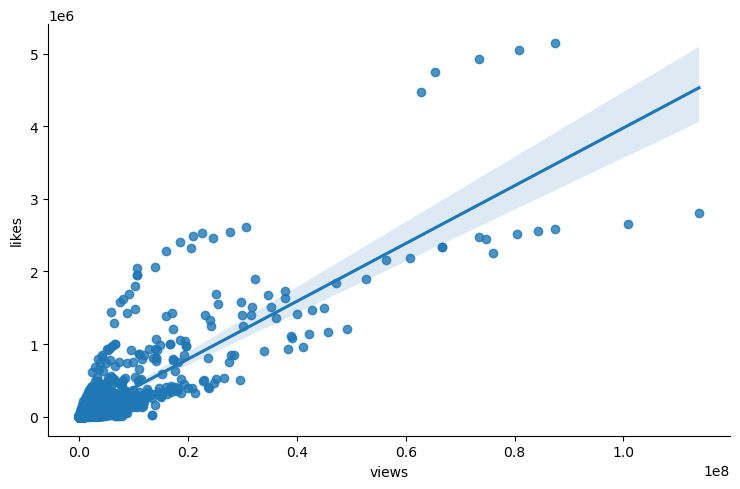

In [125]:
# views와 likes 간의 관계 확인 : 선형회귀선 확인
sns.lmplot(data=rated_videos_df, x='views', y='likes', height=5, aspect=1.5)
## default : ci 95% (신뢰구간 95%)

### 카테고리별 확인

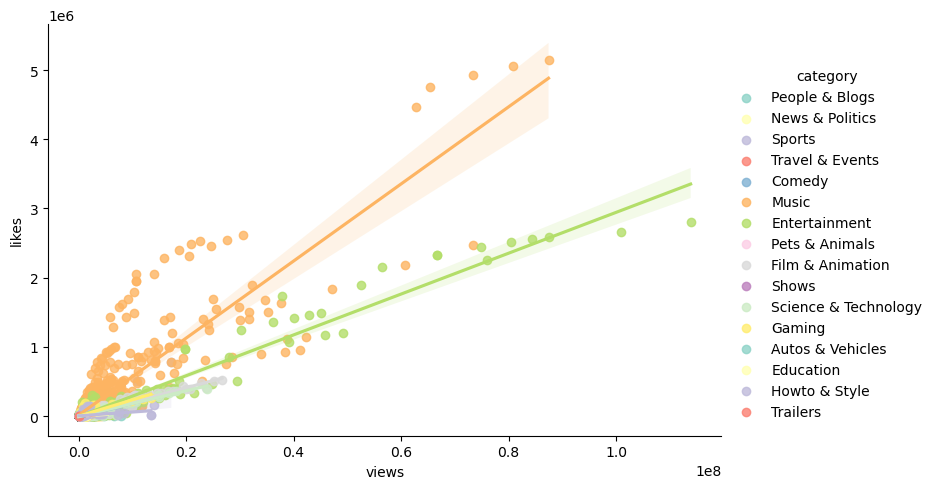

In [129]:
sns.lmplot(data=rated_videos_df, x='views', y='likes', hue='category', palette='Set3', height=5, aspect=1.5)

### views와 dislikes
: views가 많은 영상일수록 dislikes도 많을까?

### 1. 카테고리별로 views와 dislikes관계를 확인

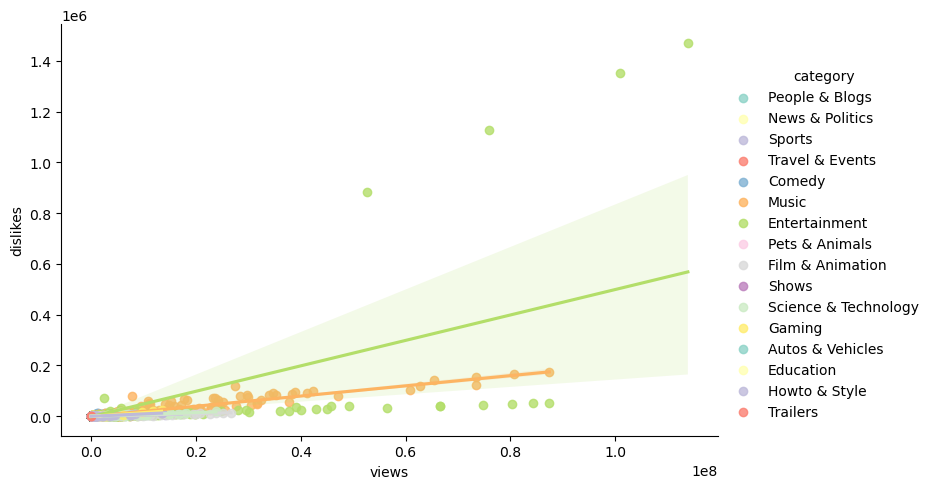

In [130]:
sns.lmplot(data=rated_videos_df, x='views', y='dislikes', hue='category', palette='Set3', height=5, aspect=1.5)

### Entertainment의 4개 점의 제외하고 상관관계 파악

In [131]:
# 피어슨 상관계수 검정
drop_index = rated_videos_df.sort_values(by='dislikes', ascending=False).head(4).index
d1_outlier_removed = rated_videos_df.drop(drop_index, axis='index')
corr = stats.pearsonr(d1_outlier_removed['views'], d1_outlier_removed['dislikes'])
print('Corr_Coefficient : %.3f \np-value : %.3f'% (corr))

Corr_Coefficient : 0.836 
p-value : 0.000


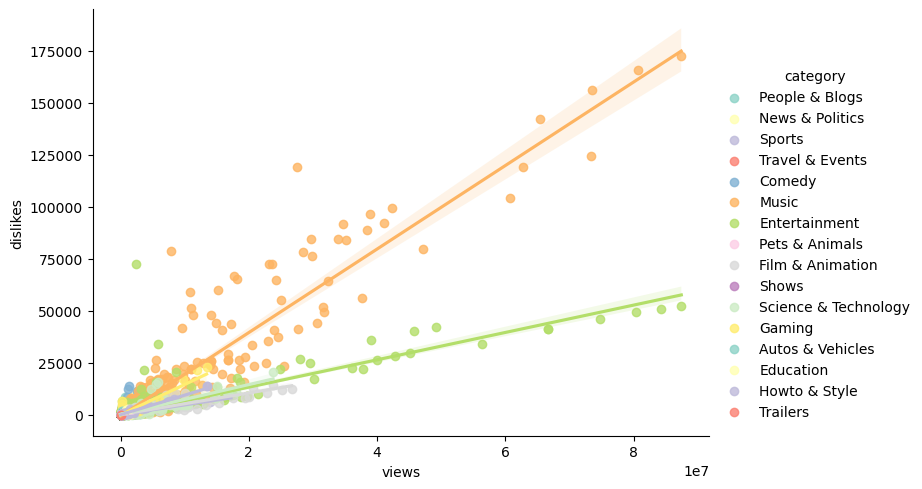

In [132]:
sns.lmplot(data=d1_outlier_removed, x='views', y='dislikes', hue='category', palette='Set3', height = 5, aspect = 1.5)

- outlier을 제외한 후 카테고리별로 선형회귀선을 더 뚜렷하게 파악할 수 있다.

# 4. 기능 사용 유무에 따른 비교

- comments_disabled와 ratings_disabled 기능을 사용한 비율 확인 % 기능 사용 여부가 views에 미치는 영향 확인

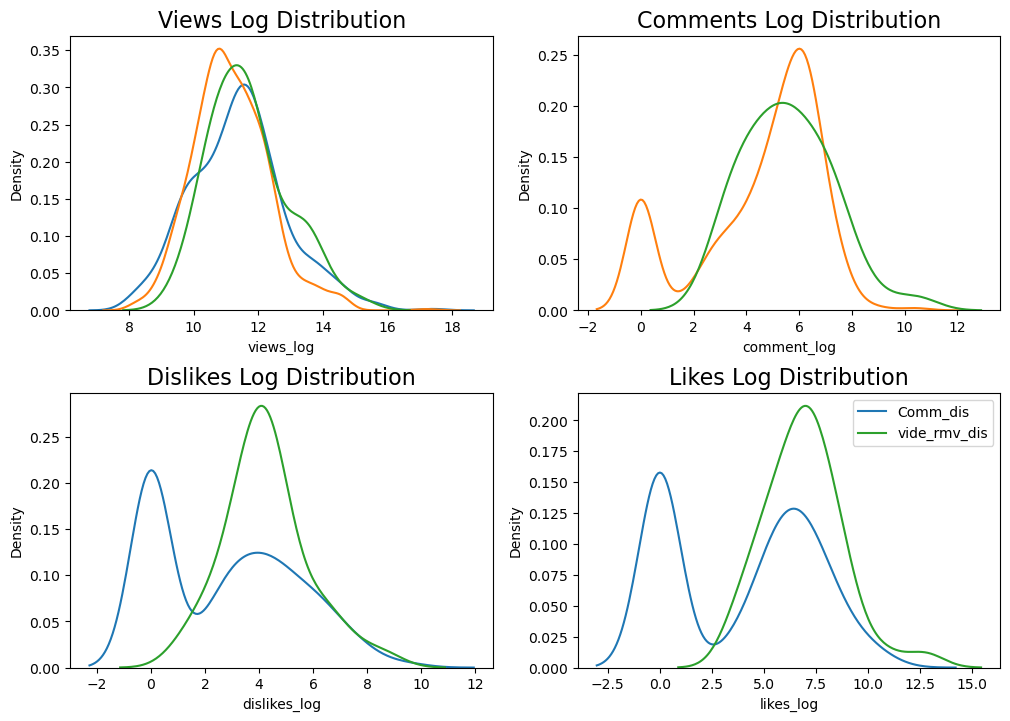

In [139]:
plt.figure(figsize=(12, 8))
plt.subplot(221)
g1 = sns.distplot(videos_df[videos_df['comments_disabled']==True]['views_log'],
                 hist=False, label='Comm_dis')
g1 = sns.distplot(videos_df[videos_df['ratings_disabled']==True]['views_log'],
                 hist=False, label='Rati_dis')
g1 = sns.distplot(videos_df[videos_df['video_error_or_removed']==True]['views_log'],
                 hist=False, label='vide_rmv_dis')
g1.set_title('Views Log Distribution', fontsize = 16)

plt.subplot(222)
g2 = sns.distplot(videos_df[videos_df['comments_disabled']==True]['comment_log'],
                 hist=False, label='Comm_dis')
g2 = sns.distplot(videos_df[videos_df['ratings_disabled']==True]['comment_log'],
                 hist=False, label='Rati_dis')
g2 = sns.distplot(videos_df[videos_df['video_error_or_removed']==True]['comment_log'],
                 hist=False, label='vide_rmv_dis')
g2.set_title('Comments Log Distribution', fontsize = 16)

plt.subplot(223)
g3 = sns.distplot(videos_df[videos_df['comments_disabled']==True]['dislikes_log'],
                 hist=False, label='Comm_dis')
g3 = sns.distplot(videos_df[videos_df['ratings_disabled']==True]['dislikes_log'],
                 hist=False, label='Rati_dis')
g3 = sns.distplot(videos_df[videos_df['video_error_or_removed']==True]['dislikes_log'],
                 hist=False, label='vide_rmv_dis')
g3.set_title('Dislikes Log Distribution', fontsize = 16)

plt.subplot(224)
g4 = sns.distplot(videos_df[videos_df['comments_disabled']==True]['likes_log'],
                 hist=False, label='Comm_dis')
g4 = sns.distplot(videos_df[videos_df['ratings_disabled']==True]['likes_log'],
                 hist=False, label='Rati_dis')
g4 = sns.distplot(videos_df[videos_df['video_error_or_removed']==True]['likes_log'],
                 hist=False, label='vide_rmv_dis')
g4.set_title('Likes Log Distribution', fontsize = 16)

plt.subplots_adjust(wspace=0.2, hspace=0.3, top = 0.9)
plt.legend(fontsize=10)
plt.show()

### comments_disabled, ratings_disabled 비율 확인

- 영상별로 data 1개만 남기되, 가장 마지막으로 trending한 날의 데이터 남기기

In [172]:
recent_videos_df = videos_df.sort_values(by='trending_date', ascending=False).drop_duplicates(subset=['video_id','title'], keep='first').reset_index()

In [173]:
comments_disabled_percentage = len(unique_videos_df[unique_videos_df['comments_disabled']]) / len(unique_videos_df)*100
ratings_disabled_percentage = len(unique_videos_df[unique_videos_df['ratings_disabled']]) / len(unique_videos_df)* 100
print(f'comments_disabled 비율 : {comments_disabled_percentage :.2f}%')
print(f'ratings_disabled 비율 : {ratings_disabled_percentage :.2f}%')

comments_disabled 비율 : 1.53%
ratings_disabled 비율 : 4.57%


### 1. 기능 유무에 따른 views 분포 확인

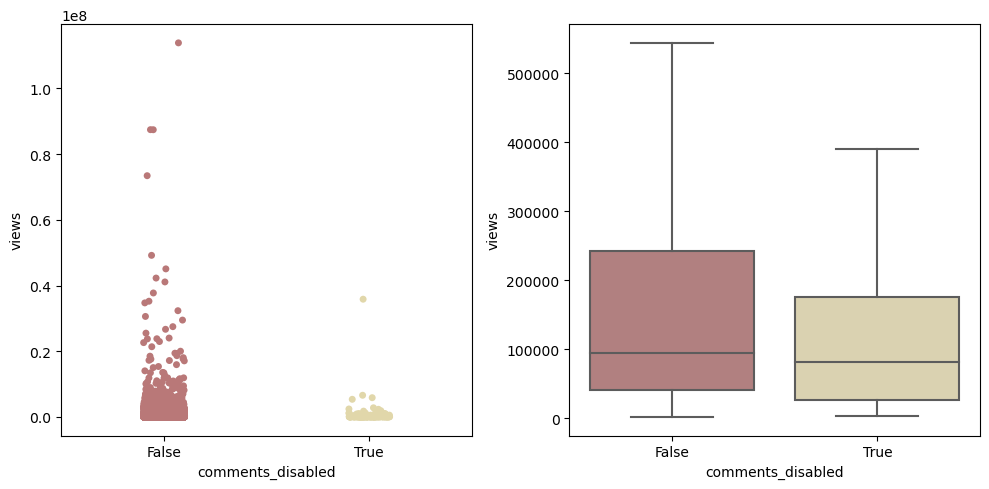

In [174]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))
sns.stripplot(data=recent_videos_df, x='comments_disabled', y='views', palette='pink', ax=ax1)
sns.boxplot(data=recent_videos_df, x='comments_disabled', y='views', palette='pink', showfliers=False, ax=ax2)
plt.tight_layout()

<Axes: xlabel='ratings_disabled', ylabel='views'>

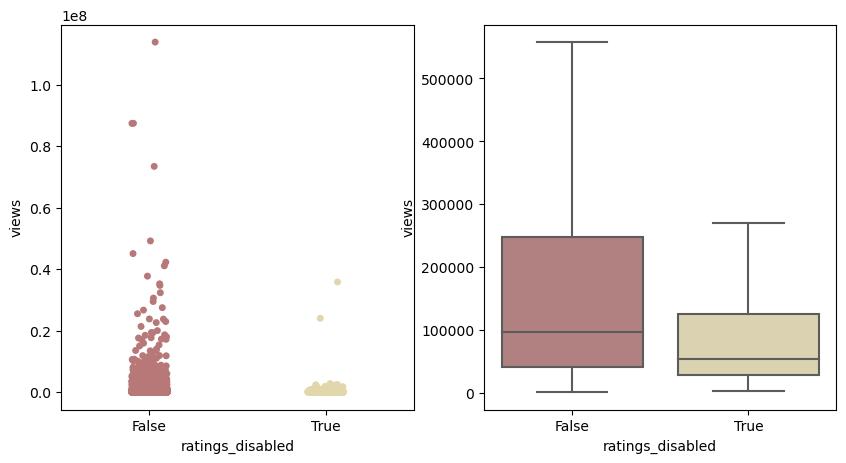

In [175]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))
sns.stripplot(data=recent_videos_df, x='ratings_disabled', y='views', palette='pink', ax=ax1)
sns.boxplot(data=recent_videos_df, x='ratings_disabled', y='views', palette='pink', showfliers=False, ax=ax2)

### 2. 기능 유무에 따른 평균 views 차이

- 평균 views 비교 후, t-test로 차이 확인

In [176]:
print('---평균 views 비교 ---')
print('comments_disabled : {:.0f}'.format(recent_videos_df['views'][recent_videos_df['comments_disabled']].mean()))
print('comments_abled : {:.0f}'.format(recent_videos_df['views'][~recent_videos_df['comments_disabled']].mean()))
print('ratings_disabled : {:.0f}'.format(recent_videos_df['views'][recent_videos_df['ratings_disabled']].mean()))
print('ratings_abled : {:.0f}'.format(recent_videos_df['views'][~recent_videos_df['ratings_disabled']].mean()))

---평균 views 비교 ---
comments_disabled : 384423
comments_abled : 369001
ratings_disabled : 209573
ratings_abled : 376942


#### 1) comments_disabled 기능 유무에 따른 차이

In [177]:
comments_disabled = recent_videos_df[recent_videos_df['comments_disabled']]
comments_abled = recent_videos_df[~recent_videos_df['comments_disabled']]

# Levene의 등분산 검정
lev_result = stats.levene(comments_disabled['views'], comments_abled['views'])
print('LeveneResult(F) : %.2f \np-value : %.3f' % (lev_result))
## 대체로 p값이 0.05 이상이면 등분산 가정, 등분산인 독립표본 t-test로 진행

LeveneResult(F) : 0.05 
p-value : 0.819


In [178]:
# 등분산인 독립표본 t-test 진행
t_result = stats.ttest_ind(comments_disabled['views'], comments_abled['views'], equal_var=True)
print('t statistic : %.2f \np-value : %.3f' % (t_result))

t statistic : 0.12 
p-value : 0.902


p값 > 0.05이고, 위에서 실제 값으로 살펴봤을 때에도 평균 views의 차이가 크지 않으므로, 유의미한 차이는 없다고 판단

#### 2) ratings_disabled 기능 유무에 따른 차이

In [179]:
ratings_disabled = recent_videos_df[recent_videos_df['ratings_disabled']]
ratings_abled = recent_videos_df[~recent_videos_df['ratings_disabled']]

# Leven의 등분산 검정
lev_result = stats.levene(ratings_disabled['views'], ratings_abled['views'])
print('LeveneResult(F) : %.2f \np-value : %.3f' % (lev_result))

LeveneResult(F) : 3.94 
p-value : 0.047


In [180]:
# 등분산이 아닌 독립표본 t-test실행
t_result = stats.ttest_ind(ratings_disabled['views'], ratings_abled['views'], equal_var=False)
print('t statistic : %.2f \np-value : %.3f'% (t_result))

t statistic : -2.78 
p-value : 0.006


- p값 < 0.01이고, 위에서 실제 값으로 살펴봤을 때에도 평균 views의 차이가 꽤 크다고 보이므로, 유의미한 차이가 있다고 생각.

### views 기준 사분위 분류 -> 분위별 비율 확인

In [181]:
# views_quartile 컬럼을 새로 생성 : 가장 views가 낮은 집단이 1st_q ~ 가장 높은 집단이 4th_q
q1, q2, q3 = np.percentile(recent_videos_df['views'], [25, 50, 75])

def get_quarter(view):
    if view < q1:
        quarter = '1st_q'
    elif view < q2:
        quarter = '2nd_q'
    elif view < q3:
        quarter = '3rd_q'
    else:
        quarter = '4th_q'
    return quarter
recent_videos_df['views_quartile'] = recent_videos_df['views'].apply(lambda view: get_quarter(view))
recent_videos_df[['views','views_quartile']].head()

,views,views_quartile
0,63716,2nd_q
1,42832,2nd_q
2,65022,2nd_q
3,92099,2nd_q
4,70141,2nd_q


### 1) views 사분위별 comments_disabled기능을 사용한 영상의 수

<Axes: xlabel='count', ylabel='views_quartile'>

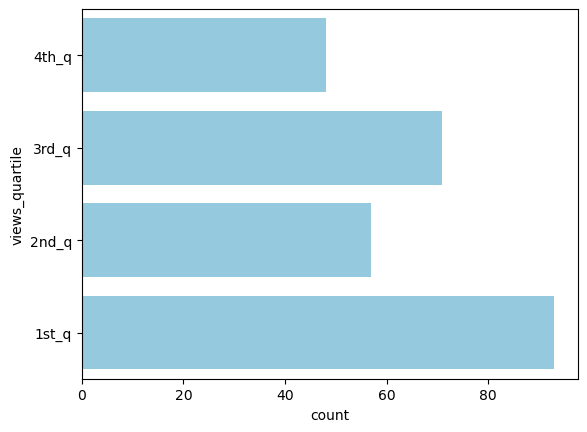

In [182]:
sns.countplot(data=recent_videos_df[recent_videos_df['comments_disabled']], y='views_quartile', order=['4th_q', '3rd_q', '2nd_q', '1st_q'], color='skyblue')

### 2) views 사분위별 ratings_disabled기능을 사용한 영상의 수

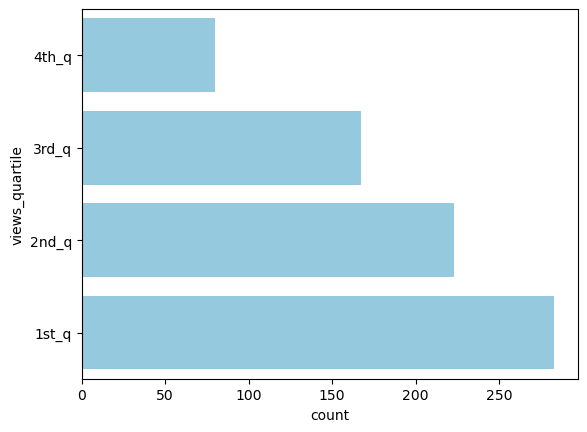

In [183]:
sns.countplot(data=recent_videos_df[recent_videos_df['ratings_disabled']], y='views_quartile', order = ['4th_q', '3rd_q', '2nd_q', '1st_q'], color='skyblue');

- views 기준 4분위중 1사분위 (하위 25%)에 ratings_disabled 기능을 사용한 영상의 수가 유독 많이 분포 (4사분위의 약 4배)
- 결론 : 평균의 차이와, 4사 분위 내 분포를 고려해보면, ratings_disabled 기능을 사용하지 않는 것이 보다 높은 views를 기록하는데 유리할 것이다.

데이터셋 출처 : 
- https://www.kaggle.com/datasets/datasnaek/youtube-new/data

참고노트 : 
- https://chaelist.github.io/docs/kaggle/youtube_trending
- https://www.kaggle.com/code/kabure/extensive-usa-youtube-eda